Acquired data form:<br>
weather: https://www.kaggle.com/datasets/ananthr1/weather-prediction<br>
Police report: https://www.kaggle.com/datasets/sam/seattle-crime?resource=download<br>

<hr>Pull in the data sets<hr>

In [2]:
import pandas as pd
#import the csv files
weather = pd.read_csv("seattle-weather.csv")
reports = pd.read_csv("SPD_Reports.csv")


#remove unused attribues
reports.drop(columns=["Offense Description", "Block", "District","Beat","2000 Census Tract","Longitude","Latitude","Offense Start Date","Offense End Date"],inplace=True)

#fix date types
reports["Report Date"] = pd.to_datetime(reports["Report Date"])
weather["date"] = pd.to_datetime(weather["date"])
#convert weather field into numerical values
weather_mapping = {'drizzle': 0, 'rain': 1, 'sun': 2, 'snow': 3, 'fog': 4}
weather["weather"] = weather["weather"].map(weather_mapping)


#look at data info
print(weather.keys())

weather.info()

print(weather.head())
print(weather.tail())
print()

reports.info()
print(reports.head())
print(reports.tail())
print()

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.6 KB
        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7        0
1 2012-01-02           10.9      10.6       2.8   4.5        1
2 2012-01-03            0.8      11.7       7.2   2.3        1
3 2012-01-04           20.3      12.2       5.6   4.7        1
4 2012-01

In [3]:
# dates that are covered in both data feilds
start_date = pd.to_datetime("2014-01-17")
end_date = pd.to_datetime("2015-12-31")

# Filter out unusable records
reports_filtered = reports[(reports["Report Date"] >= start_date) & (reports["Report Date"] <= end_date)]
weather_filtered = weather[(weather["date"] >= start_date) & (weather["date"] <= end_date)]

# Look at data info
print(weather_filtered.head())
print(weather_filtered.tail())
print()
print(reports_filtered.head())
print(reports_filtered.tail())
print()

          date  precipitation  temp_max  temp_min  wind  weather
747 2014-01-17            0.0       5.6       2.8   2.3        2
748 2014-01-18            0.0       9.4       0.6   2.2        2
749 2014-01-19            0.0       6.1       3.3   2.5        2
750 2014-01-20            0.0      10.0       2.8   2.2        2
751 2014-01-21            0.0      10.0       1.7   1.5        2
           date  precipitation  temp_max  temp_min  wind  weather
1456 2015-12-27            8.6       4.4       1.7   2.9        1
1457 2015-12-28            1.5       5.0       1.7   1.3        1
1458 2015-12-29            0.0       7.2       0.6   2.6        4
1459 2015-12-30            0.0       5.6      -1.0   3.4        2
1460 2015-12-31            0.0       5.6      -2.1   3.5        2

            Offense Type         Report Date
40     WEAPON-POSSESSION 2015-11-12 06:00:00
41    BURGLARY-FORCE-RES 2015-11-25 14:41:00
42   NARC-POSSESS-MARIJU 2015-12-17 00:07:00
50         ASSLT-AGG-GUN 2015-08-

In [4]:
#combine data sets, add all crimes together into a new attribute called "Offence Coune"
merged_data = pd.merge(weather_filtered, reports_filtered.groupby('Report Date').size().reset_index(name='Offense Count'), left_on="date", right_on="Report Date", how="left")

#look at new data set
print(merged_data.info())
print(merged_data.head())
print(merged_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           714 non-null    datetime64[ns]
 1   precipitation  714 non-null    float64       
 2   temp_max       714 non-null    float64       
 3   temp_min       714 non-null    float64       
 4   wind           714 non-null    float64       
 5   weather        714 non-null    int64         
 6   Report Date    60 non-null     datetime64[ns]
 7   Offense Count  60 non-null     float64       
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 44.8 KB
None
        date  precipitation  temp_max  temp_min  wind  weather Report Date  \
0 2014-01-17            0.0       5.6       2.8   2.3        2  2014-01-17   
1 2014-01-18            0.0       9.4       0.6   2.2        2         NaT   
2 2014-01-19            0.0       6.1       3.3   2.5        2  2014-01-19   

<hr>Discover interesting relations<hr>
Ideally, I would like to be able to predict the number of crimes based on how nice of a day it is (all weather-like attributes). <br>

               temp_max  precipitation  temp_min      wind  Offense Count
temp_max       1.000000      -0.243342  0.874063 -0.170141      -0.074903
precipitation -0.243342       1.000000 -0.077557  0.361548      -0.052525
temp_min       0.874063      -0.077557  1.000000 -0.077935      -0.041988
wind          -0.170141       0.361548 -0.077935  1.000000      -0.062192
Offense Count -0.074903      -0.052525 -0.041988 -0.062192       1.000000


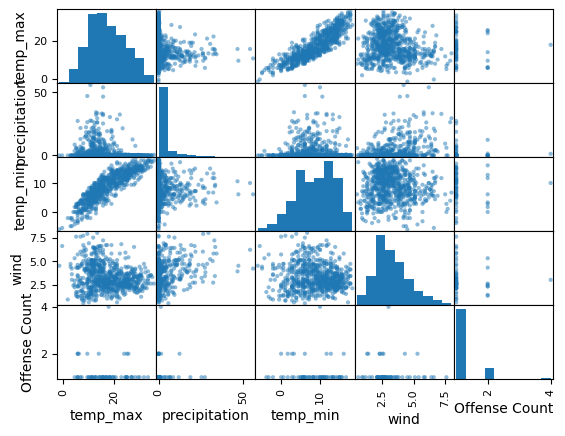

In [5]:
from pandas.plotting import scatter_matrix
#what we want to look at
compare = ["temp_max","precipitation","temp_min","wind","Offense Count"]
#graph
scatter_matrix(merged_data[compare])

#find and print correlations
corr = merged_data[compare].corr()
print(corr) 

No strong correlation (except temp_min and temp_max) appears to be present. All weather conditions have a negative correlation. Hopefully combining them will show something. 

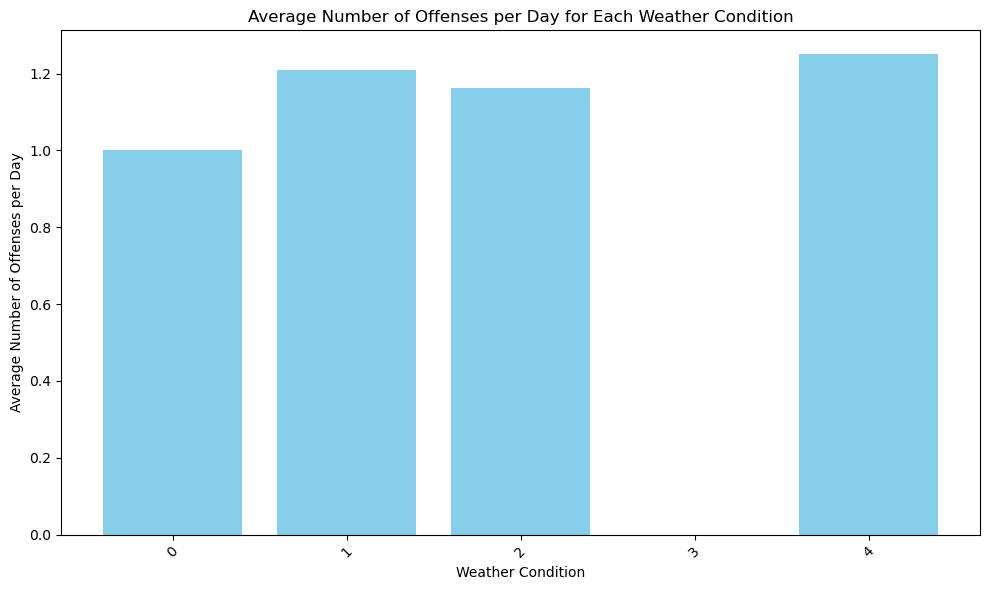

In [6]:
import matplotlib.pyplot as plt

# Group merged data by weather condition and calculate the mean number of offenses for each condition
avg_offenses_by_weather = merged_data.groupby('weather')['Offense Count'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_offenses_by_weather['weather'], avg_offenses_by_weather['Offense Count'], color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Offenses per Day')
plt.title('Average Number of Offenses per Day for Each Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It appears that there is minimal correlation but I will investigate it further. 

<hr>Cleaning the data<hr>
Already done. Had to do it in order to utilize the data.<br> <br> 

<hr>Create training/test sets<hr>

In [7]:
import numpy as np
def fractional_split(data_set, test_fraction=0.2, seed=41):# 41 pretty good seed
    data_count = len(data_set)
    test_count = int(test_fraction*data_count)
    
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(data_count)
    
    # Use the front of the shuffled list as the test set
    # Use the bask of the shuffled list as the training set
    test_indices = shuffled_indices[:test_count]
    train_indices = shuffled_indices[test_count:]
    
    return data_set.iloc[train_indices], data_set.iloc[test_indices]

# Replace null values in the "Offense Count" column with 0
merged_data['Offense Count'].fillna(0, inplace=True)

train_set, test_set = fractional_split(merged_data)

print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

572 142
          date  precipitation  temp_max  temp_min  wind  weather Report Date  \
614 2015-09-23            0.0      20.6       8.3   1.8        2         NaT   
578 2015-08-18            0.0      30.0      15.0   3.0        2         NaT   
506 2015-06-07            0.0      31.1      15.6   3.2        2         NaT   
204 2014-08-09            0.0      27.2      15.6   4.1        2         NaT   
671 2015-11-19            2.0       8.9       2.8   4.2        1         NaT   

     Offense Count  
614            0.0  
578            0.0  
506            0.0  
204            0.0  
671            0.0  
          date  precipitation  temp_max  temp_min  wind  weather Report Date  \
640 2015-10-19            0.3      17.2      12.2   2.6        1         NaT   
633 2015-10-12            4.6      18.3      10.6   2.8        1         NaT   
390 2015-02-11            0.0      12.8       5.6   1.0        4  2015-02-11   
227 2014-09-01            0.0      23.3      12.8   2.5        2 

More on finding correlations <br>
Seeing if linear regression can make anything of the numbers

In [8]:
# Make a copy of the training set
working_set = train_set.copy()
use =["precipitation", "temp_max", "temp_min", "wind","weather"]
find = "Offense Count"

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

X = working_set[use]
Y = working_set[find]
reg.fit(X, Y)

LinearRegression()

In [9]:
X_test = test_set[use]
Y_test = test_set[find]
Y_pred = reg.predict(X_test)

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09836797688518946


is .09 a bad value?

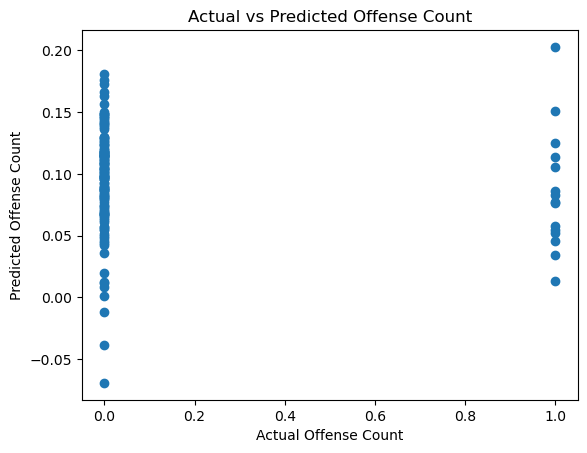

In [10]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.scatter(test_set["Offense Count"], Y_pred)
plt.xlabel("Actual Offense Count")
plt.ylabel("Predicted Offense Count")
plt.title("Actual vs Predicted Offense Count")
plt.show()

In [11]:
class ZeroPredictor:
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros(len(X))

# Instantiate the ZeroPredictor
zero_model = ZeroPredictor()

# Fit the baseline model
zero_model.fit(X, Y)

# Predict using the baseline model
zero_pred = zero_model.predict(X_test)

# Calculate the mean squared error for the baseline model
zero_mse = mean_squared_error(Y_test, zero_pred)
print("Baseline Mean Squared Error:", zero_mse)

Baseline Mean Squared Error: 0.1056338028169014


No, .09 is not a bad Mean Squared Error value as it is better than a model that does not predict. We can assume that since we were able to find a relatively accurate predictive model there is some correlation that can be found when looking at "precipitation", "temp_max", "temp_min", "wind", and "weather" together. 